<a href="https://colab.research.google.com/github/dan-pirjol/base-camp/blob/master/JackwerthMethodology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# file curve_fitter.py
import pandas
import numpy
import matplotlib.pyplot as plt

In [22]:
from google.colab import files
uploaded = files.upload()

Saving GME_Jan2021_iv.csv to GME_Jan2021_iv.csv


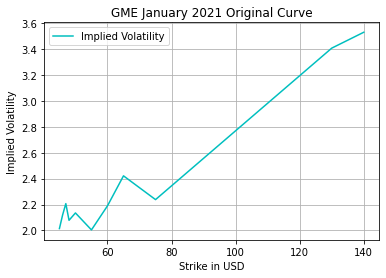

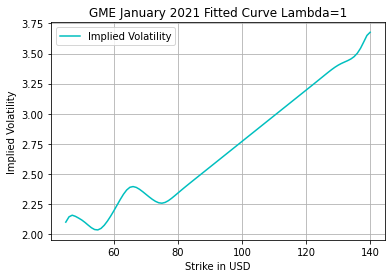

<Figure size 432x288 with 0 Axes>

In [28]:
if __name__ == "__main__":

    # name of directory to save pictures to
    pics_folder = "./"

    # File name - the name of the file of the data
    # Pic file name - the name you want the picture saved as and the title
    # Trade off lambda - determines the fitness/smoothness of the fitted curve
    # Delta - the distance between consecutive strike prices
    # Truncation terms - how many terms should be truncated from each end of the graphs
    info = ["GME_Jan2021_iv.csv","GME January 2021",1,1,5]
    df = pandas.read_csv(f"./{info[0]}")
    iv_column_name = "IV"
    strike_column_name = "Strike"
    fit_curve(df, info[1], iv_column_name, strike_column_name, info[2], info[3], pics_folder, info[4])



In [27]:
def fit_curve(df: pandas.DataFrame, filename: str, imp_vol_col: str, strike_col: str,
        trade_off_lambda: int, delta: int, pics_folder: str, truncation_term: int):
 
    implied_voltatilies = df[imp_vol_col].reset_index(drop=True)
    strikes = df[strike_col].reset_index(drop=True).to_numpy()
    total_len = len(implied_voltatilies)

    # calculating the new implied volatility values using the method described by Jackwerth
    list_of_rows = []
    known_sigma_vector = []
    for i in range(0,total_len):

        j = i + 1
        known_sigma_vector_value = ((trade_off_lambda*(total_len+1))/(total_len*(delta^4)))*(implied_voltatilies.loc[i])
        known_sigma_vector.append(known_sigma_vector_value)

        bracket_term = (6+((trade_off_lambda*(total_len+1))/(total_len * (delta^4))))
        row_of_matrix = [0]*len(implied_voltatilies)
        if i == 0:
            row_of_matrix[0] = bracket_term
            row_of_matrix[1] = -4
            row_of_matrix[2] = 1
        elif i == 1:
            row_of_matrix[0] = -4
            row_of_matrix[1] = bracket_term
            row_of_matrix[2] = -4
            row_of_matrix[3] = 1
        elif i == (total_len-2):
            row_of_matrix[total_len-4] = 1
            row_of_matrix[total_len-3] = -4
            row_of_matrix[total_len-2] = bracket_term
            row_of_matrix[total_len-1] = -4
        elif i == (total_len-1):
            row_of_matrix[total_len-3] = 1
            row_of_matrix[total_len-2] = -4
            row_of_matrix[total_len-1] = bracket_term
        else:
            row_of_matrix[i-2] = 1
            row_of_matrix[i-1] = -4
            row_of_matrix[i] = bracket_term
            row_of_matrix[i+1] = -4
            row_of_matrix[i+2] = 1

        list_of_rows.append(row_of_matrix)

    A_mat = numpy.matrix(list_of_rows)
    sigma_vector = numpy.array(known_sigma_vector)

    unknown_sigma_vector = numpy.linalg.solve(A_mat,sigma_vector)

    # Plotting original curve
    if (truncation_term == 0):
        plt.plot(strikes, implied_voltatilies,'c')
    else:
        plt.plot(strikes[truncation_term:-truncation_term], implied_voltatilies[truncation_term:-truncation_term],'c')
    plt.title(f"{filename.replace('.csv','')} Original Curve")
    plt.xlabel("Strike in USD")
    plt.ylabel("Implied Volatility")
    plt.grid(b=True)
    plt.legend(['Implied Volatility'])
    plt.savefig(f"./{pics_folder}/{filename.replace('.csv','')}_original_curve.png")
    plt.show()
    plt.clf()

    # Plotting fitted curve
    if (truncation_term == 0):
        plt.plot(strikes, unknown_sigma_vector,'c')
    else:
        plt.plot(strikes[truncation_term:-truncation_term], unknown_sigma_vector[truncation_term:-truncation_term],'c')
    plt.title(f"{filename.replace('.csv','')} Fitted Curve Lambda={trade_off_lambda}")
    plt.xlabel("Strike in USD")
    plt.ylabel("Implied Volatility")
    plt.grid(b=True)
    plt.legend(['Implied Volatility'])
    plt.savefig(f"./{pics_folder}/{filename.replace('.csv','')}_{str(trade_off_lambda).replace('0.','Point')}_fitted_curve.png")
    plt.show()
    plt.clf()

